<a target="_blank" href="https://colab.research.google.com/github/chandralegend/semantix/blob/main/try.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
# !pip install semantix[openai]

In [ ]:
%env OPENAI_API_KEY=sk-

In [3]:
from semantix import Semantic, enhance
from semantix.llms.openai import OpenAI
from enum import Enum
from typing import List

llm = OpenAI()


class Personality(Enum):
    """Personality of the Person"""

    INTROVERT = "Introvert"
    EXTROVERT = "Extrovert"


class LifeWork:
    """Life Work of the Person"""

    def __init__(self, work: str, year: int, description: str):
        self.work = work
        self.year = year
        self.description = description

    def __repr__(self) -> str:
        return f"{self.work} ({self.year}) - {self.description}"

    def __str__(self) -> str:
        return f"{self.work} ({self.year}) - {self.description}"


class Person:
    """Person"""

    def __init__(
        self,
        full_name: Semantic[str, "Fullname of the Person"],
        yod: Semantic[int, "Year of Death"],
        personality: Semantic[Personality, "Personality of the Person"],
        life_works: Semantic[List[LifeWork], "Life's Works of the Person"]
      ) -> None:
        self.full_name = full_name
        self.yod = yod
        self.personality = personality
        self.life_works = life_works

    def __repr__(self) -> str:
        repr_str = (
            f"{self.full_name} was a {self.personality.value} person who died in {self.yod}\n\nLife's Work:\n"
            ""
        )
        for i, work in enumerate(self.life_works):
            repr_str += f"{i+1}. {work}\n"
        return repr_str


@enhance("Get Person Information use common knowledge", llm)
def get_person_info(
    name: Semantic[str, "Name of the Person"],
) -> Person:
    ...

In [4]:
get_person_info(name="Elon Musk")

Elon Musk was a Extrovert person who died in None

Life's Work:
1. CEO of SpaceX (2002) - Founded SpaceX to reduce space transportation costs and enable the colonization of Mars.
2. CEO of Tesla, Inc. (2004) - Led Tesla in the production of electric vehicles and renewable energy solutions.
3. Co-founder of PayPal (1999) - Contributed to the development of online payment systems through X.com, which later became PayPal.
4. Founder of The Boring Company (2016) - Established a tunnel construction and infrastructure services company.
5. Co-founder of Neuralink (2016) - Focuses on developing technologies to integrate the human brain with AI.

In [5]:
get_person_info(name="Bill Gates")

Bill Gates was a Extrovert person who died in 0

Life's Work:
1. Co-founder of Microsoft (1975) - Founded Microsoft, which became the world's largest personal-computer software company.
2. Philanthropist (2000) - Established the Bill & Melinda Gates Foundation to enhance healthcare and reduce extreme poverty.

In [6]:
get_person_info(name="Martin Luther King Jr.")

Martin Luther King Jr. was a Extrovert person who died in 1968

Life's Work:
1. Civil Rights Movement (1955) - Leader in the American civil rights movement, advocating for nonviolent resistance to racial segregation and discrimination.
2. I Have a Dream (1963) - Famous speech delivered during the March on Washington for Jobs and Freedom, expressing his vision of a racially integrated and harmonious America.

In [7]:
# !pip install semantix[image]

In [8]:
!curl -o mandela.jpg https://hips.hearstapps.com/hmg-prod/images/_photo-by-per-anders-petterssongetty-images.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 53038  100 53038    0     0   286k      0 --:--:-- --:--:-- --:--:--  287k


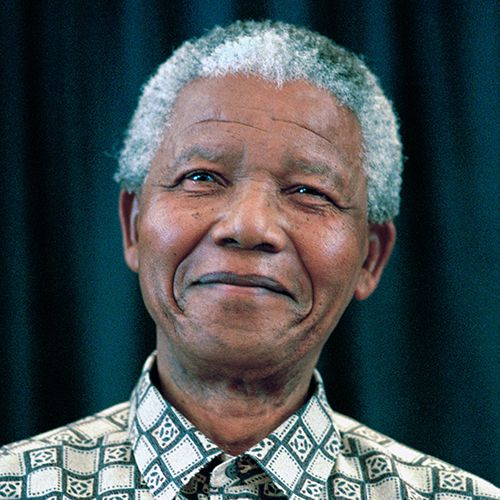

In [9]:
from IPython.display import Image
Image('mandela.jpg')

In [10]:
from semantix import Image

@enhance("Get Person Information use common knowledge", llm, method="Reason")
def get_person_info(
    img: Semantic[Image, "Image of a Person"],
) -> Person: ...

In [11]:
get_person_info(img=Image('mandela.jpg'))

Nelson Mandela was a Extrovert person who died in 2013

Life's Work:
1. Anti-Apartheid Activism (1960) - Led the struggle against apartheid in South Africa.
2. Nobel Peace Prize (1993) - Awarded for his efforts to dismantle apartheid and work towards reconciliation.
3. First Black President of South Africa (1994) - Served as President and focused on national reconciliation.
4. Long Walk to Freedom (1995) - Autobiography detailing his life and the struggle against apartheid.